In [42]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3bf67778-8ef4-4cfa-8f12-05837115b4fa',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
    
# jupyter lab --NotebookApp.iopub_data_rate_limit=1.0e10

{'status': {'timestamp': '2022-06-20T14:22:22.687Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 9913}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9542, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [43]:
import pandas as pd 

#This allows you to see all the columns, not just like 15
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [44]:
# This normalizes the data and makes it all pretty in a dataframe


df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9542,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.907242e+07,1.907242e+07,...,43.3915,4.325556e+11,None,2022-06-20T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:22:33.668222
1,1027,Ethereum,ETH,ethereum,5761,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.212426e+08,1.212426e+08,...,15.0807,1.365165e+11,None,2022-06-20T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:22:33.668222
2,825,Tether,USDT,tether,34883,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.792430e+10,7.971062e+10,...,7.4952,7.963367e+10,None,2022-06-20T14:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-20 14:22:33.668222
3,3408,USD Coin,USDC,usd-coin,4541,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.592110e+10,5.592110e+10,...,6.1788,5.593299e+10,None,2022-06-20T14:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-20 14:22:33.668222
4,1839,BNB,BNB,bnb,964,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,...,3.9010,3.571604e+10,None,2022-06-20T14:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:22:33.668222
5,4687,Binance USD,BUSD,binance-usd,3862,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.718701e+10,1.718701e+10,...,1.9024,1.722106e+10,None,2022-06-20T14:19:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-20 14:22:33.668222
6,2010,Cardano,ADA,cardano,460,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.427770e+10,...,1.8432,2.225428e+10,None,2022-06-20T14:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:22:33.668222
7,52,XRP,XRP,xrp,741,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,...,1.7248,3.230130e+10,None,2022-06-20T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:22:33.668222
8,5426,Solana,SOL,solana,335,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.425096e+08,5.116169e+08,...,1.3474,1.822182e+10,None,2022-06-20T14:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:22:33.668222
9,74,Dogecoin,DOGE,dogecoin,487,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,0.8796,7.962817e+09,None,2022-06-20T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:22:33.668222


In [45]:
    
def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3bf67778-8ef4-4cfa-8f12-05837115b4fa',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    # df2 = pd.json_normalize(data['data'])
    # df2['Timestamp'] = pd.to_datetime('now')
    # df = df.append(df2)
        
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    
    
    if not os.path.isfile('API.csv'):
        df.to_csv('API.csv', header = 'column_names')
    else:
        df.to_csv('API.csv', mode='a', header = False)

In [46]:
import os
from time import time
from time import sleep

for i in range(330):
    api_runner()
    print('API Runner Completed')
    sleep(5)
exit()

API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed
API Runner Completed


KeyboardInterrupt: 

In [47]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

# pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [61]:
df = pd.read_csv('API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9542,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.907242e+07,...,43.3915,4.325556e+11,NaN,2022-06-20T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:23:20.771799
1,1,1027,Ethereum,ETH,ethereum,5761,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.212426e+08,...,15.0807,1.365165e+11,NaN,2022-06-20T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:23:20.771799
2,2,825,Tether,USDT,tether,34883,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.792430e+10,...,7.4952,7.963367e+10,NaN,2022-06-20T14:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-20 14:23:20.771799
3,3,3408,USD Coin,USDC,usd-coin,4541,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.592110e+10,...,6.1788,5.593299e+10,NaN,2022-06-20T14:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-20 14:23:20.771799
4,4,1839,BNB,BNB,bnb,964,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",165116760.0,1.632770e+08,...,3.9010,3.571604e+10,NaN,2022-06-20T14:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:23:20.771799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,6636,Polkadot,DOT,polkadot-new,353,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,9.875793e+08,...,0.8577,8.674913e+09,NaN,2022-06-20T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:23:50.358671
86,11,4943,Dai,DAI,multi-collateral-dai,1003,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'ethereum-ecosystem', '...",NaN,6.754139e+09,...,0.7462,6.755082e+09,NaN,2022-06-20T14:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-06-20 14:23:50.358671
87,12,1958,TRON,TRX,tron,637,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'bnb-c...",NaN,9.251414e+10,...,0.6262,5.669482e+09,NaN,2022-06-20T14:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-20 14:23:50.358671
88,13,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,455,2019-01-30T00:00:00.000Z,"['medium-of-exchange', 'defi', 'wrapped-tokens...",NaN,2.672897e+05,...,0.6067,5.493282e+09,NaN,2022-06-20T14:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,2022-06-20 14:23:50.358671


In [63]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d',
                                'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.497604,6.947817,-12.037819,-29.709679,-51.707287,-51.992228
Ethereum,-0.246153,9.606881,-7.459058,-42.741055,-64.297495,-62.588114
Tether,0.013948,0.022577,0.046073,0.020485,-0.127466,-0.131795
USD Coin,-0.001648,-0.000460,-0.004408,-0.005674,0.025399,0.039365
BNB,1.304962,4.939318,-2.466223,-29.673994,-48.989704,-47.035837
Binance USD,0.003443,-0.004910,-0.013732,0.119427,0.249095,0.291366
Cardano,-0.525701,7.759627,8.918809,-6.326596,-48.699760,-49.670973
XRP,-0.188141,3.453272,3.941054,-21.405085,-57.523434,-61.855795
Solana,0.199406,12.122455,32.844016,-28.558205,-67.080748,-61.730354


In [64]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.497604
              quote.USD.percent_change_24h     6.947817
              quote.USD.percent_change_7d    -12.037819
              quote.USD.percent_change_30d   -29.709679
              quote.USD.percent_change_60d   -51.707287
                                                ...    
UNUS SED LEO  quote.USD.percent_change_24h     6.128216
              quote.USD.percent_change_7d      0.793121
              quote.USD.percent_change_30d     9.844951
              quote.USD.percent_change_60d    -9.171050
              quote.USD.percent_change_90d   -12.525969
Length: 90, dtype: float64

In [65]:
type(df4)

pandas.core.series.Series

In [66]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                                
Bitcoin      quote.USD.percent_change_1h    0.497604
             quote.USD.percent_change_24h   6.947817
             quote.USD.percent_change_7d  -12.037819
             quote.USD.percent_change_30d -29.709679
             quote.USD.percent_change_60d -51.707287
...                                              ...
UNUS SED LEO quote.USD.percent_change_24h   6.128216
             quote.USD.percent_change_7d    0.793121
             quote.USD.percent_change_30d   9.844951
             quote.USD.percent_change_60d  -9.171050
             quote.USD.percent_change_90d -12.525969

[90 rows x 1 columns]

In [67]:
type(df5)

pandas.core.frame.DataFrame

In [68]:
# index = pd.Index(range(len(df5)))
# df6 = df5.set_index(index)
df6 = df5.reset_index()

df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.497604
1,Bitcoin,quote.USD.percent_change_24h,6.947817
2,Bitcoin,quote.USD.percent_change_7d,-12.037819
3,Bitcoin,quote.USD.percent_change_30d,-29.709679
4,Bitcoin,quote.USD.percent_change_60d,-51.707287
...,...,...,...
85,UNUS SED LEO,quote.USD.percent_change_24h,6.128216
86,UNUS SED LEO,quote.USD.percent_change_7d,0.793121
87,UNUS SED LEO,quote.USD.percent_change_30d,9.844951
88,UNUS SED LEO,quote.USD.percent_change_60d,-9.171050


In [69]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.497604
1,Bitcoin,quote.USD.percent_change_24h,6.947817
2,Bitcoin,quote.USD.percent_change_7d,-12.037819
3,Bitcoin,quote.USD.percent_change_30d,-29.709679
4,Bitcoin,quote.USD.percent_change_60d,-51.707287
...,...,...,...
85,UNUS SED LEO,quote.USD.percent_change_24h,6.128216
86,UNUS SED LEO,quote.USD.percent_change_7d,0.793121
87,UNUS SED LEO,quote.USD.percent_change_30d,9.844951
88,UNUS SED LEO,quote.USD.percent_change_60d,-9.171050


In [70]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d',
                                                       'quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.497604
1,Bitcoin,24h,6.947817
2,Bitcoin,7d,-12.037819
3,Bitcoin,30d,-29.709679
4,Bitcoin,60d,-51.707287
...,...,...,...
85,UNUS SED LEO,24h,6.128216
86,UNUS SED LEO,7d,0.793121
87,UNUS SED LEO,30d,9.844951
88,UNUS SED LEO,60d,-9.171050


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

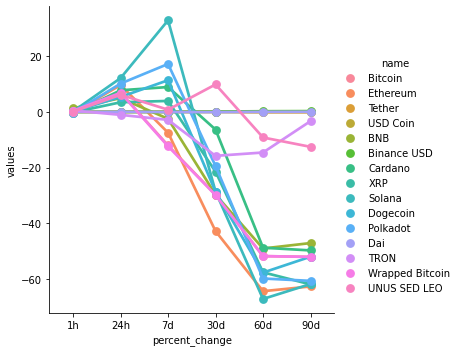

In [72]:
sns.catplot(x='percent_change',y='values',data=df7,hue='name',kind='point')

In [73]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name=='Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,20597.887242,2022-06-20 14:23:20.771799
15,Bitcoin,20597.887242,2022-06-20 14:23:26.206373
30,Bitcoin,20597.887242,2022-06-20 14:23:32.239667
45,Bitcoin,20597.887242,2022-06-20 14:23:38.278096
60,Bitcoin,20597.887242,2022-06-20 14:23:44.324087
75,Bitcoin,20597.887242,2022-06-20 14:23:50.358671


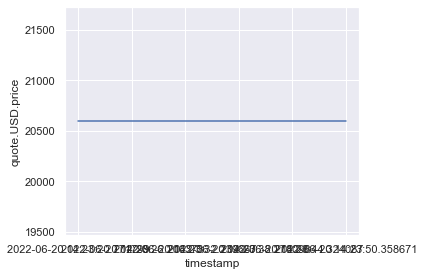

In [102]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y= 'quote.USD.price', data=df8)
plt.tight_layout()